In [1]:
import sys
sys.path.append('../../')

# Interaction

In [3]:
from pepkit.md.interaction import compute_interaction_fingerprint, protein_interaction_frequency, plot_interaction_fingerprint

/homes/biertank/tieu/miniconda3/envs/peputil/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/homes/biertank/tieu/miniconda3/envs/peputil/lib/python3.11/site-packages/MDAnalysis/topology/tables.py:52: DeprecationWarning: Deprecated in version 2.8.0
MDAnalysis.topology.tables has been moved to MDAnalysis.guesser.tables. This import point will be removed in MDAnalysis version 3.0.0
  warnings.warn(wmsg, category=DeprecationWarning)


In [4]:
df_filt = compute_interaction_fingerprint(gro_path='../md_data/md_0_100.gro',traj_path='../md_data/md_0_100.xtc',query_sel="resid 157:170",reference_sel="resid 1:156", max_frames=100, threshold=0.00, n_jobs=4)

Analysing 100/10001 frames (stride=1)…


/homes/biertank/tieu/miniconda3/envs/peputil/lib/python3.11/site-packages/MDAnalysis/topology/guessers.py:184: DeprecationWarning: `guess_atom_element` is deprecated!
`guess_atom_element` will be removed in release 3.0.0.
MDAnalysis.topology.guessers is deprecated in favour of the new Guessers API. See MDAnalysis.guesser.default_guesser for more details.
  [guess_atom_element(name) for name in atom_names], dtype=object
  0%|          | 0/100 [00:00<?, ?it/s]/homes/biertank/tieu/miniconda3/envs/peputil/lib/python3.11/site-packages/MDAnalysis/converters/RDKit.py:497: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
/homes/biertank/tieu/miniconda3/envs/peputil/lib/python3.11/site-packages/MDAnalysis/converters/RDKit.py:497: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms coordinates
  warnings.warn(
/homes/biertank/tieu/miniconda3/envs/peputil/lib/python3.11/site-packages/MDAnalysis/converter

Kept 9 interactions ≥ 0% occurrence


In [5]:
protein_interaction_frequency(df_filt)

,ligand,protein,interaction,frequency
0,TRP160,GLY53,VdWContact,0.91
1,TRP160,GLY53,HBDonor,0.78
2,VAL161,GLN48,VdWContact,0.32
3,THR162,GLN48,VdWContact,0.06
4,TRP160,ASN56,VdWContact,0.04
5,TRP160,GLN48,VdWContact,0.04
6,LEU163,ASN144,VdWContact,0.03
7,TRP160,ASN56,HBDonor,0.02
8,LEU163,MET49,VdWContact,0.01


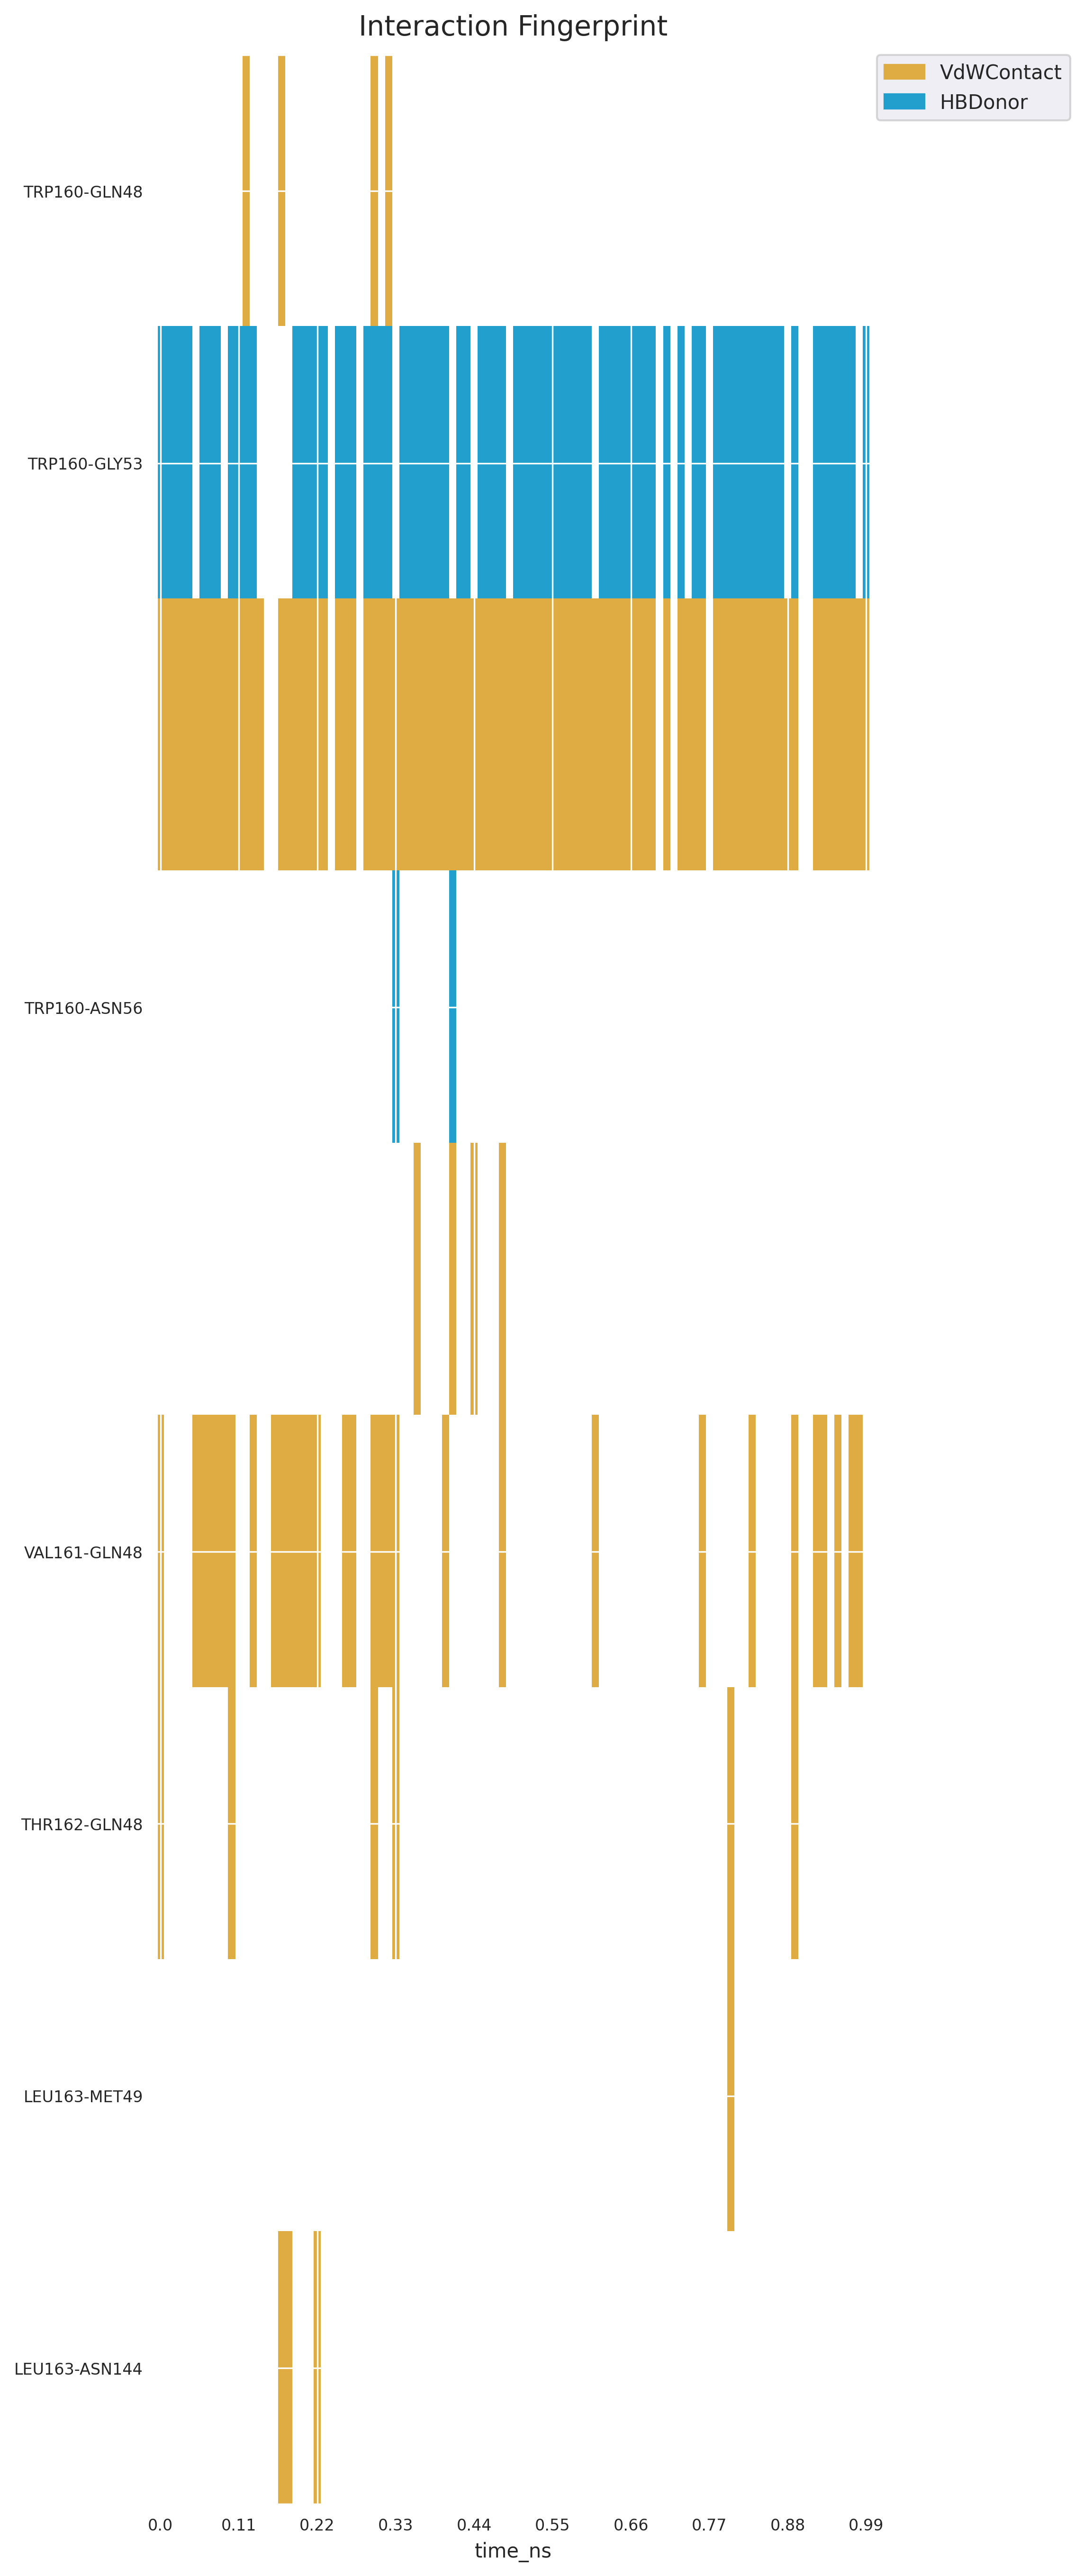

In [6]:
plot_interaction_fingerprint(df_filt, save_path=None)

# RMSD

In [7]:
from pepkit.md.stable import compute_rmsf, plot_rmsf, compute_rmsd, plot_rmsd

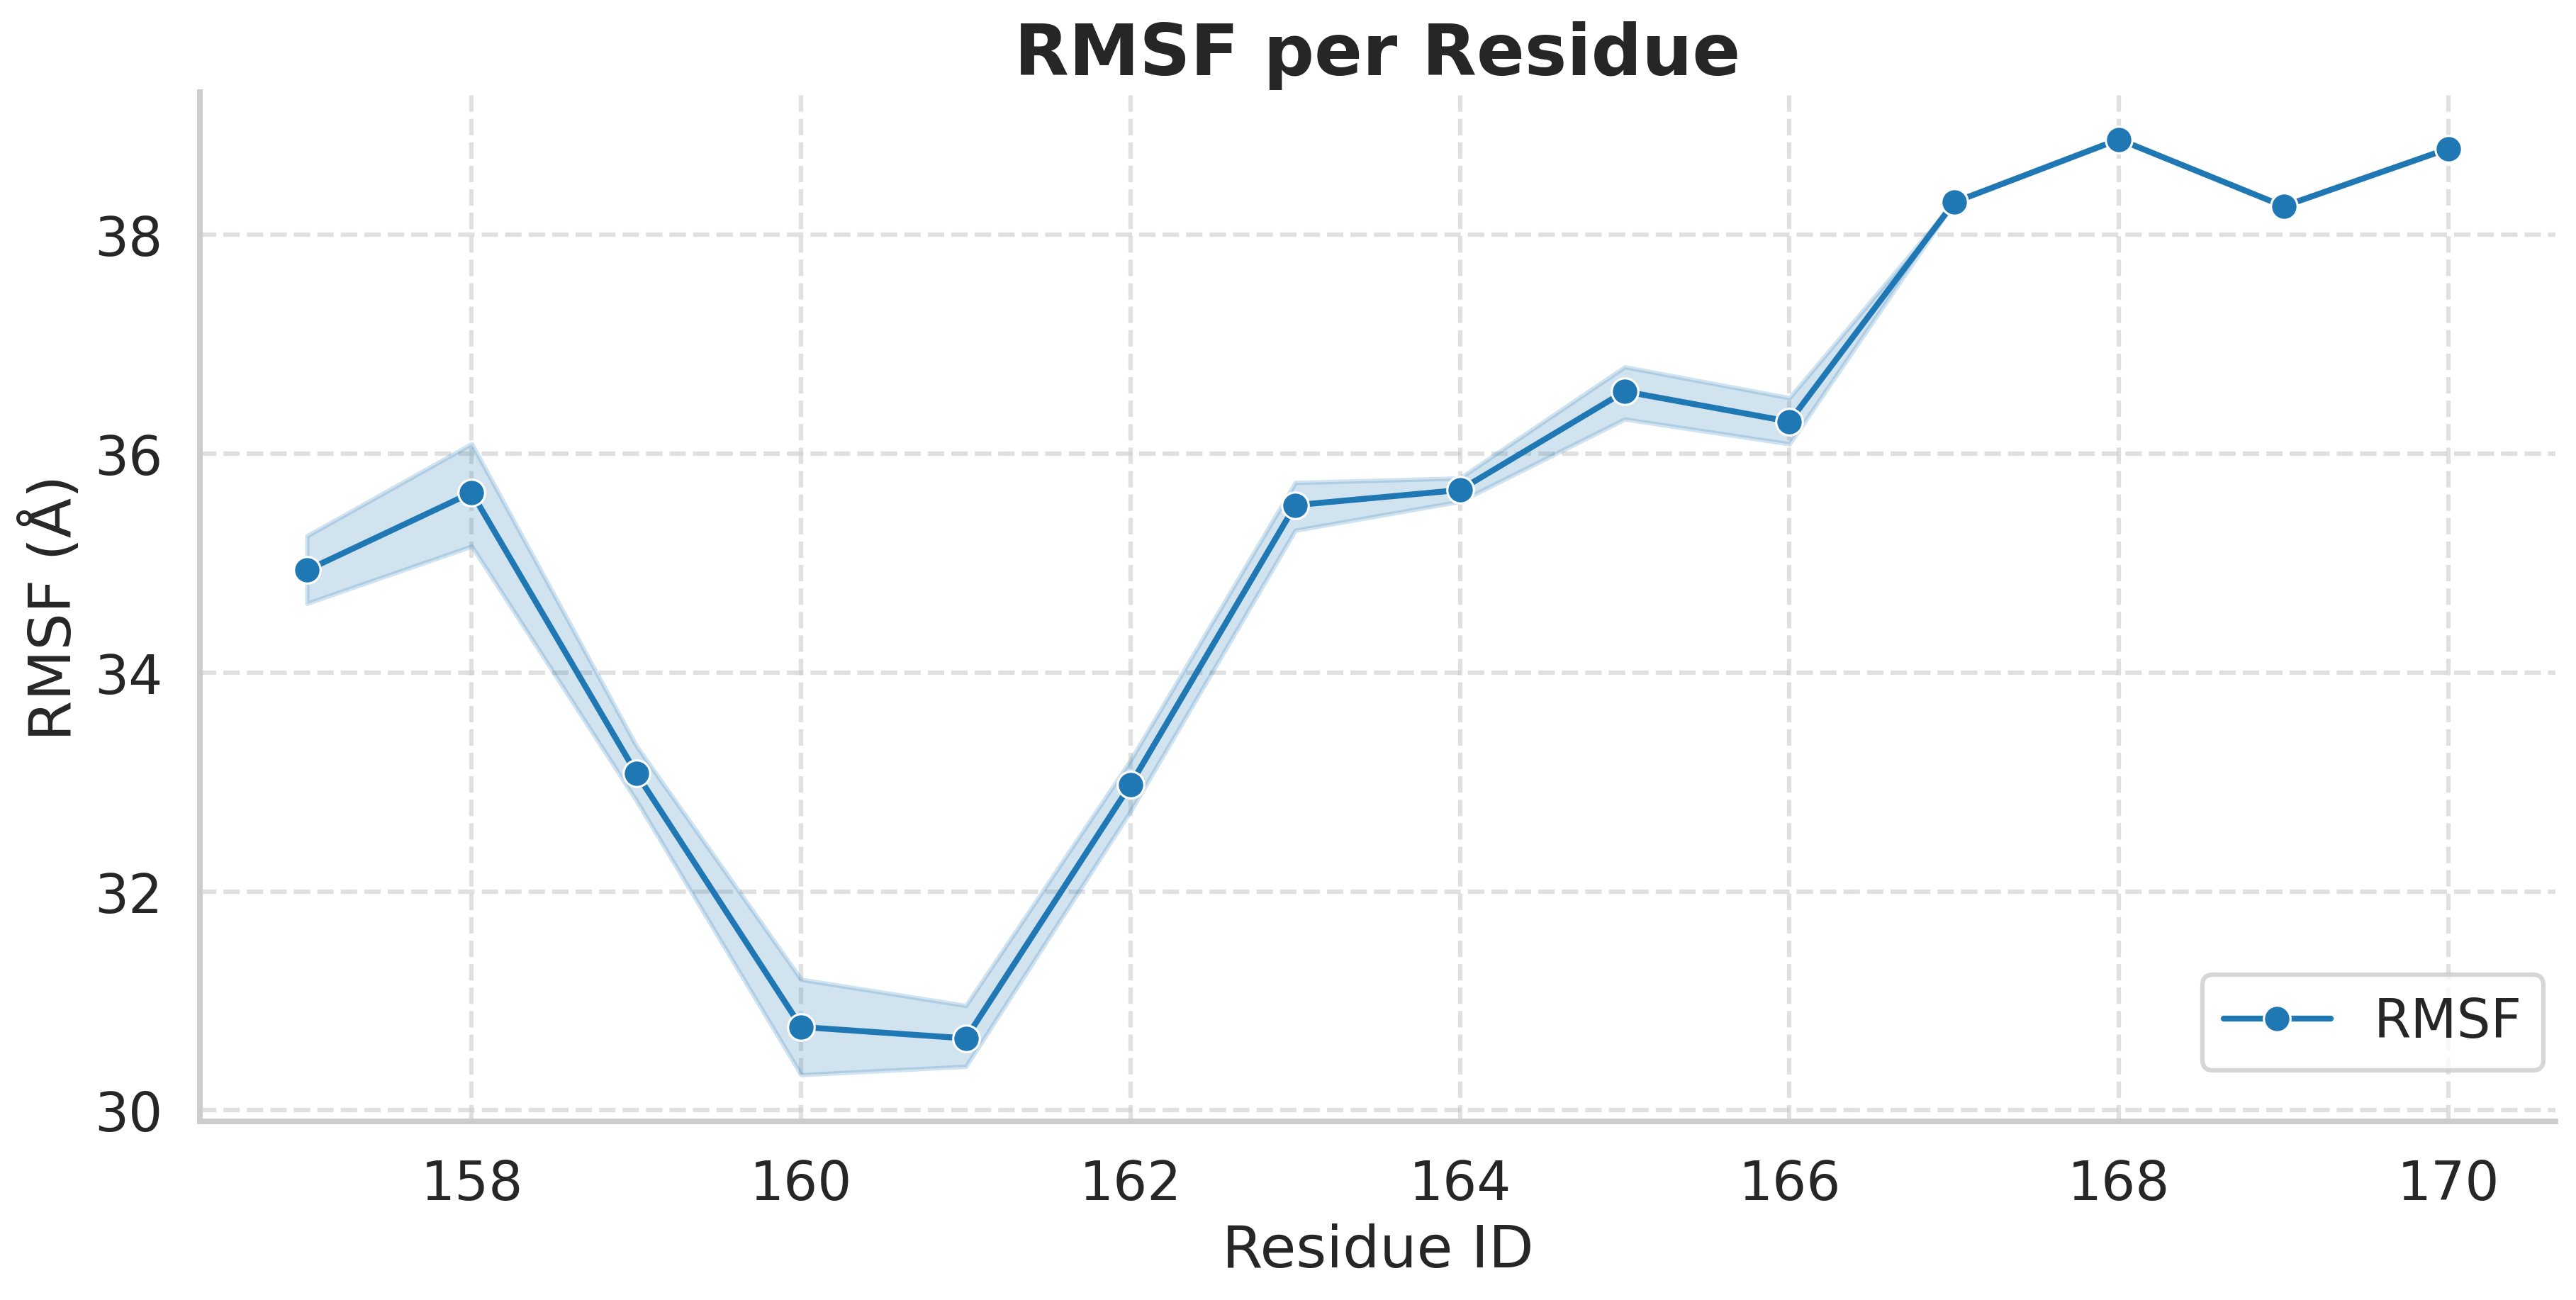

In [8]:
rmsf = compute_rmsf(gro='../md_data/md_0_100.gro',
                      traj='../md_data/md_0_100.xtc',
                      res_sel="resid 157:170", ref_frame=0, max_frames=10000, verbose=0, n_jobs=4, do_align=False)
plot_rmsf(rmsf)

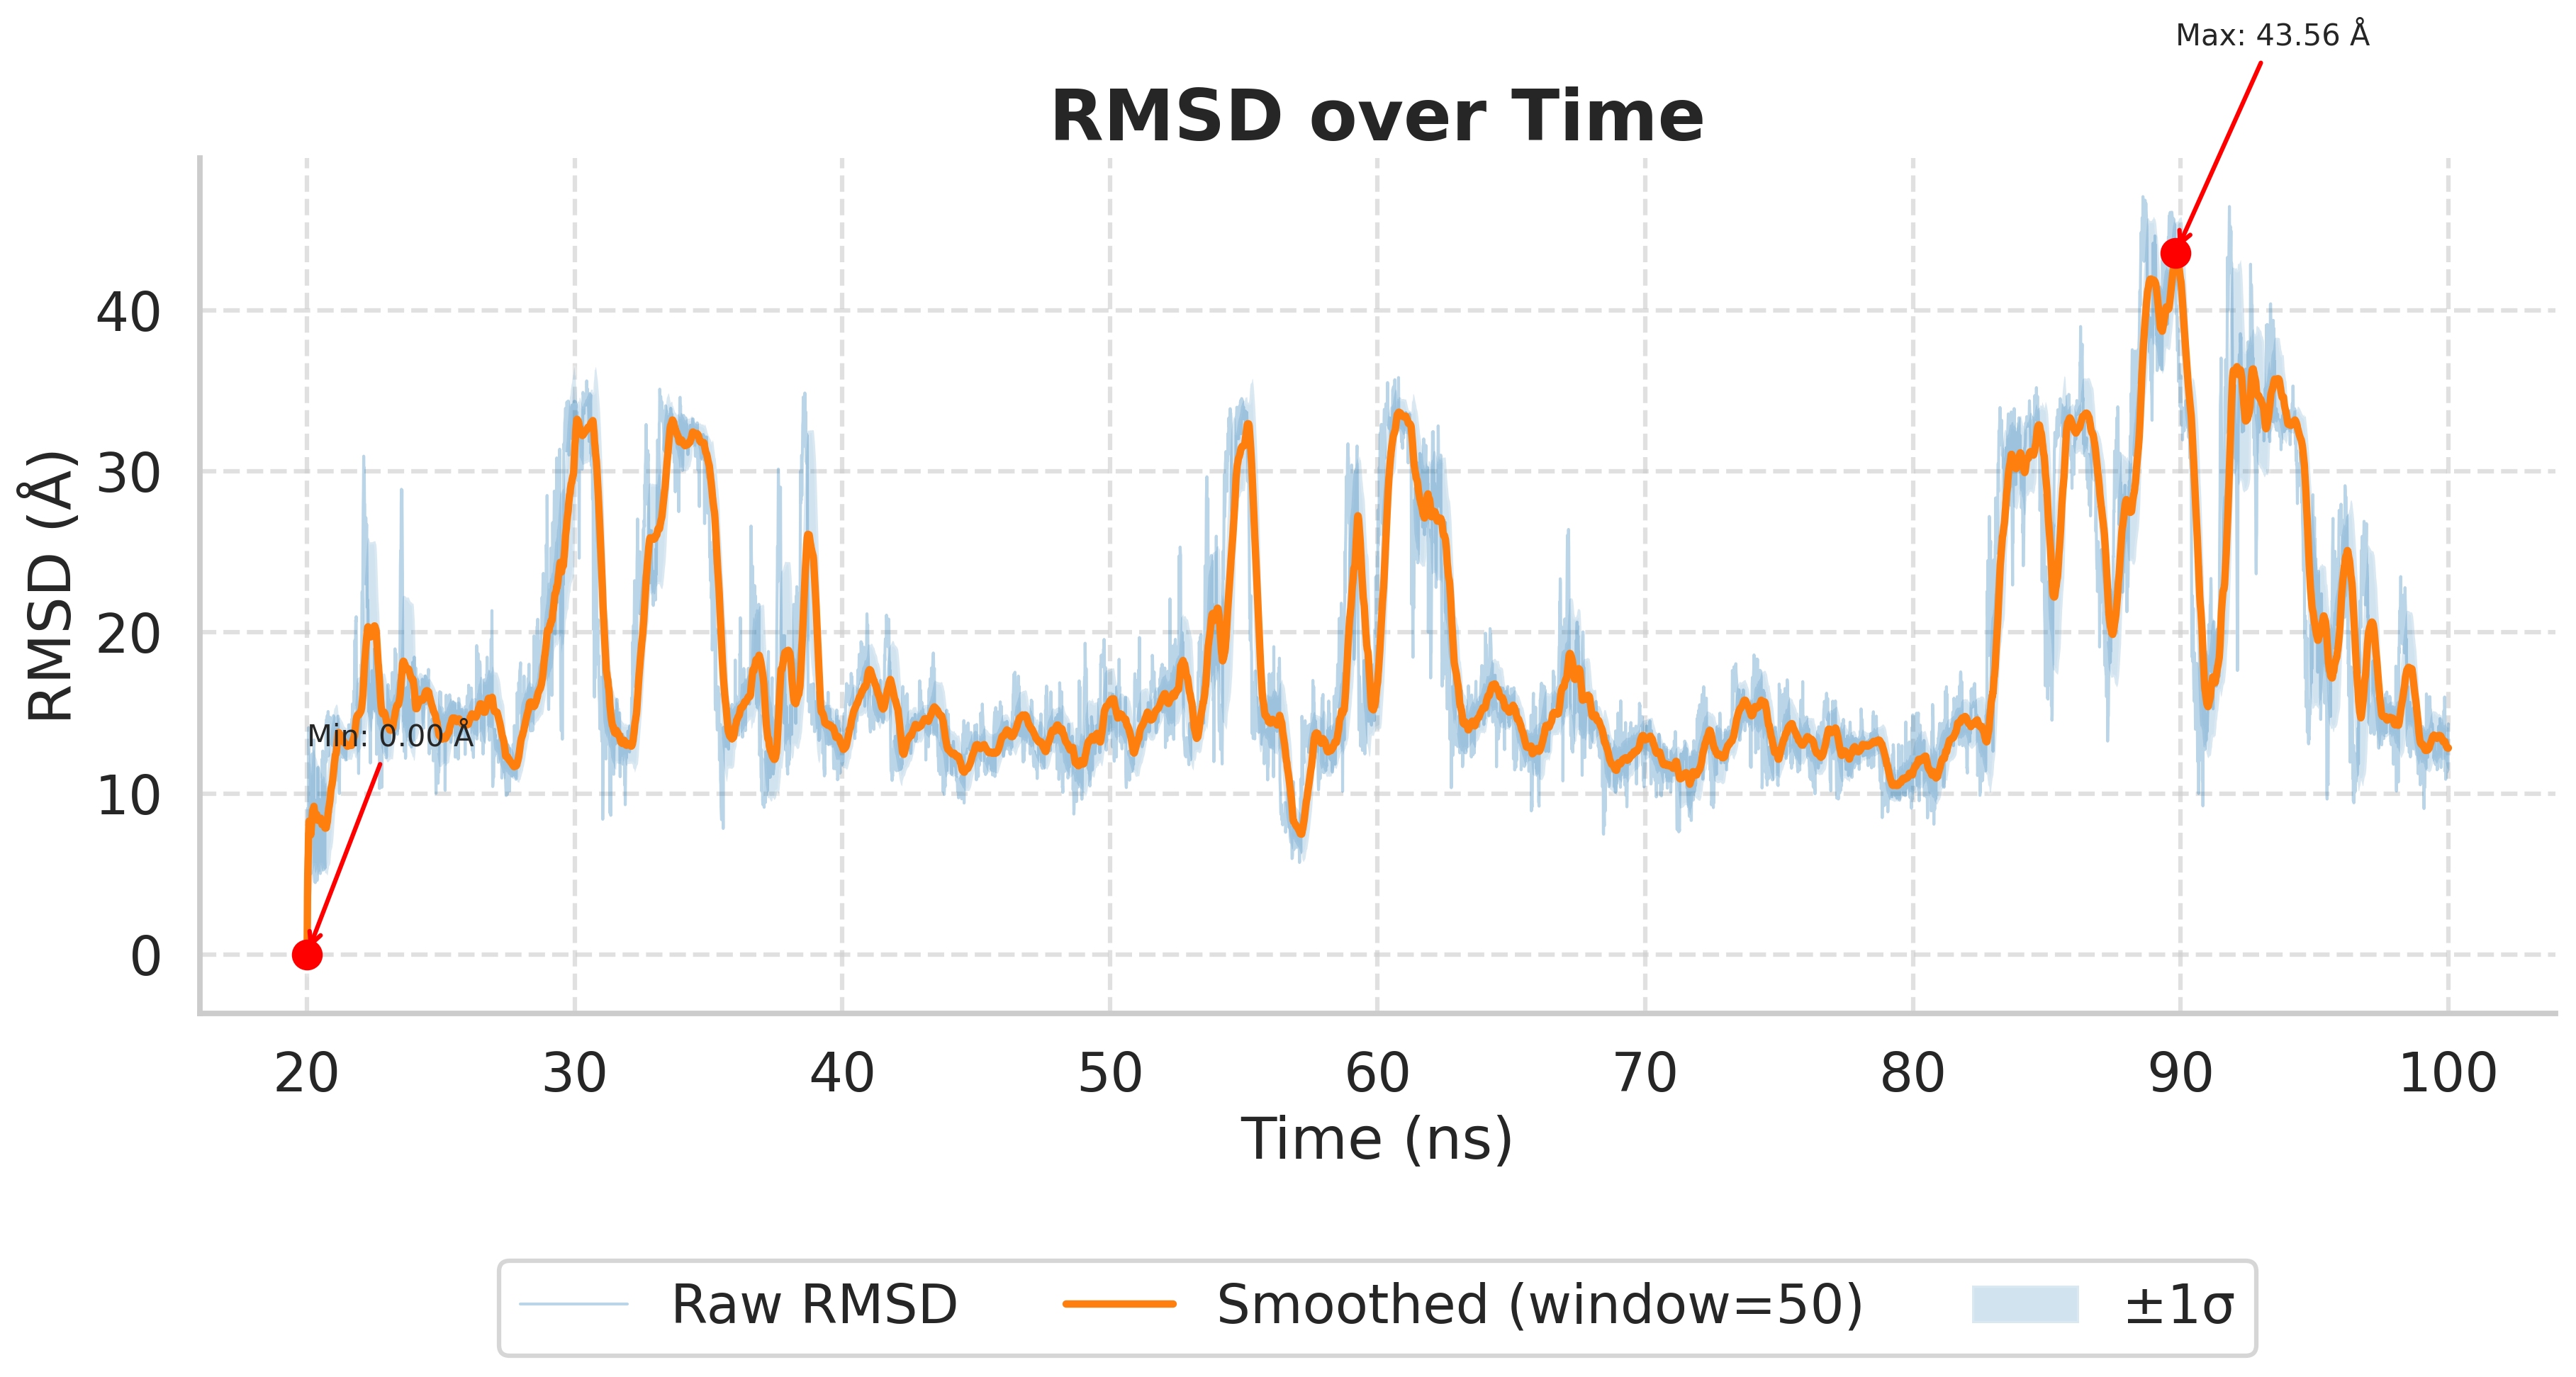

In [9]:
rmsd = compute_rmsd(gro='../md_data/md_0_100.gro',
                      traj='../md_data/md_0_100.xtc',
                      atom_sel="resid 157:170", ref_frame=2000, time_divisor=1000)
plot_rmsd(rmsd)